# Predictive Modeling for House Price Estimation in King County: An Analysis of Housing Market Trends and Impact of Features

# 1.Business Understanding
##  a) Introduction

The real estate market is a significant sector that involves buying and selling properties. For buyers and sellers, accurately predicting house prices is crucial for making informed decisions. This project aims to develop a predictive model that can estimate house prices in King County based on various features.

It is important to note that data visualization and analysis, although not explicit project requirements, will play a crucial role in building better models and effectively communicating the findings. By incorporating visualization techniques and conducting thorough analysis, I can support my regression modeling process and provide meaningful recommendations to homeowners based on the model's insights.

The King County House Sales dataset contains information about house sales in King County, including features such as the number of bedrooms, bathrooms, square footage, condition, and location. By analyzing this dataset, we can gain insights into the factors that influence house prices and build a model to predict prices accurately


## b) Problem Statement

The main problem addressed in this project is the lack of an efficient method to predict house prices accurately in King County. Existing methods might not consider all relevant features and may lead to inaccurate estimations. This project aims to develop a predictive model that takes into account multiple variables and accurately predicts house prices in King County.

## c) Main Objective:
The main objective of this project is to develop an accurate predictive model that can estimate house prices in King County based on various features. By analyzing the King County House Sales dataset and implementing appropriate machine learning algorithms, the goal is to create a reliable tool for buyers, sellers, and real estate professionals to make informed decisions about house prices in the region.


## d) Specific Objectives:

1. Develop and evaluate machine learning models to identify the most influential factors that impact house prices in the King County housing market. This will involve exploring various regression algorithms and feature selection techniques to determine the key predictors of house prices.

2. Assess the performance of the developed machine learning models in predicting house prices by comparing them with traditional valuation methods such as appraisal techniques or comparable sales analysis. Evaluate the models based on relevant metrics such as mean absolute error (MAE), root mean square error (RMSE), and R-squared to measure their accuracy and effectiveness in predicting future house prices.

3. Deploy the developed predictive model as an online tool accessible to potential homebuyers, sellers, and real estate professionals. Create a user-friendly interface that allows users to input relevant property features and obtain an estimated house price. This deployment will provide a convenient and efficient way for users to make informed decisions based on the model's predictions and aid in their real estate transactions.

## e) Experimrntal Design

1. Data Collection and Cleaning

Obtain the King County House Sales dataset from the provided kc_house_data.csv file, located in the "data" folder.
Read the dataset and check for any missing values, inconsistencies, or anomalies.
Perform data cleaning procedures, such as handling missing values, correcting data types, and removing duplicates.
Address any outliers or erroneous entries to ensure data integrity.

2. Exploratory Data Analysis (EDA)

Conduct EDA to gain insights into the dataset, its features, and their relationships.
Visualize the data through charts, graphs, and summary statistics to identify patterns and trends.
Explore the correlation between other factors and house prices to guide feature selection.

3. Data Modeling and Model Performance Evaluation

Split the dataset into training and testing subsets.
Build a multiple linear regression model using the training data, considering relevant features related to home renovations.
Evaluate the model's performance using appropriate metrics such as mean squared error (MSE), R-squared, and cross-validation techniques.
Iteratively refine the model by selecting significant features and adjusting model parameters.

4. Use the Model to Make Predictions:

Apply the refined model to the testing subset to predict house prices based on renovation factors.
Compare the predicted prices with the actual prices to assess the model's accuracy and validity.

5. Conclusions and Recommendations:

Summarize the findings from the regression model, including the identified significant renovation factors and their coefficients.
Interpret the regression coefficients to understand the impact of each factor on house prices.
Provide actionable recommendations to homeowners based on the model's insights, advising them on renovations that can potentially increase the value of their homes.

6. Model Deployment:

Prepare the final model for deployment, ensuring it can be readily utilized for future predictions.
Document the model's methodology, assumptions, and limitations for transparency.
Create documentation or a user guide to assist stakeholders in effectively utilizing the model's predictions.
By following this experimental design, I will systematically approach the project, ensuring the data is collected and cleaned, exploring relationships through EDA, developing and evaluating a regression model, drawing conclusions and providing recommendations, and finally, deploying the model for practical use.


##  f) Data Understanding

The data used in this project,that has 20 columns and 21597 rows,was downloaded from [here](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction)
, consists of information related to house sales. Here is a description for each column:


**id**: A unique identifier for each house.

**date**: The date when the house was sold.

**price**: The target variable representing the price of the house.

**bedrooms**: The number of bedrooms in the house.

**bathrooms**: The number of bathrooms in the house.

**sqft_living**: The square footage of the home.

**sqft_lot**: The square footage of the lot.

**floors**: The total number of floors in the house.

**waterfront**: Indicates whether the house has a view to a waterfront.

**view**: Indicates whether the house has been viewed.

**condition**: Represents the overall condition of the house.

**grade**: Represents the overall grade given to the housing unit based on the King County grading system.

**sqft_above**: The square footage of the house apart from the basement.

**sqft_basement**: The square footage of the basement.

**yr_built**: The year the house was built.

**yr_renovated**: The year when the house was renovated.

**zipcode**: The zip code of the house's location.

**lat**: The latitude coordinate of the house's location.

**long**: The longitude coordinate of the house's location.

**sqft_living15**: The square footage of interior housing living space for the nearest 15 neighbors.

**sqft_lot15**: The square footage of the land lots of the nearest 15 neighbors.

# 2.  Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer


# 3.Reading Data

In [4]:
# Reading the dataset from the CSV file
df = pd.read_csv("data\kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

# 3) Data Preparation

Preparing the dataset by ensuring that all variables are in the correct format and handle missing values appropriately. I'll then convert categorical variables into dummy variables or use appropriate encoding techniques, such as one-hot encoding.

In [6]:
# Calculating the percentage of missing data for 'waterfront'  and 'yr_renovated'  columns to help guide decision

waterfront_missing_percentage = df['waterfront'].isnull().sum() / len(df['waterfront']) * 100
print("Percentage of missing data for 'waterfront' column: {:.2f}%".format(waterfront_missing_percentage))


yr_renovated_missing_percentage = df['yr_renovated'].isnull().sum() / len(df['yr_renovated']) * 100
print("Percentage of missing data for 'yr_renovated' column: {:.2f}%".format(yr_renovated_missing_percentage))

Percentage of missing data for 'waterfront' column: 11.00%
Percentage of missing data for 'yr_renovated' column: 17.79%


In [7]:
# Droppin columns
df.drop(['id','yr_renovated', 'date', 'zipcode', 'lat', 'long'], axis=1, inplace=True)

# Filling missing values in 'waterfront' column with 0
df['waterfront'].fillna(0, inplace=True)

# Removing duplicates
df.drop_duplicates(inplace=True)

# Displaying information about the reprocessed DataFrame
df.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,NONE,Average,7 Average,1180,0.0,1955,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1690,7639
2,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,1800,7503


In [8]:
# Performing one-hot encoding for the 'condition' column
condition_encoded = pd.get_dummies(df['condition'], prefix='condition')

# Concatenating the encoded columns to the original DataFrame
df_encoded = pd.concat([df, condition_encoded], axis=1)

# Dropping the original 'condition' column
df_encoded.drop('condition', axis=1, inplace=True)

# Displaying the updated DataFrame with one-hot encoded 'condition' column
df_encoded.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,condition_Average,condition_Fair,condition_Good,condition_Poor,condition_Very Good
0,221900.0,3,1.00,1180,5650,1.0,0,NONE,7 Average,1180,0.0,1955,1340,5650,True,False,False,False,False
1,538000.0,3,2.25,2570,7242,2.0,NO,NONE,7 Average,2170,400.0,1951,1690,7639,True,False,False,False,False
2,180000.0,2,1.00,770,10000,1.0,NO,NONE,6 Low Average,770,0.0,1933,2720,8062,True,False,False,False,False
3,604000.0,4,3.00,1960,5000,1.0,NO,NONE,7 Average,1050,910.0,1965,1360,5000,False,False,False,False,True
4,510000.0,3,2.00,1680,8080,1.0,NO,NONE,8 Good,1680,0.0,1987,1800,7503,True,False,False,False,False


In [11]:
#Retrieving the unique values of the 'grade' column from the DataFrame for Mapping

unique_grades = df_encoded['grade'].unique()
unique_grades

array(['7 Average', '6 Low Average', '8 Good', '11 Excellent', '9 Better',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], dtype=object)

In [13]:
#Mapping

grade_mapping = {
    '3 Poor': 3,
    '4 Low': 4,
    '5 Fair': 5,
    '6 Low Average': 6,
    '7 Average': 7,
    '8 Good': 8,
    '9 Better': 9,
    '10 Very Good': 10,
    '11 Excellent': 11,
    '12 Luxury': 12,
    '13 Mansion': 13
}
df_encoded['grade'] = df_encoded['grade'].replace(grade_mapping)
df_encoded.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,condition_Average,condition_Fair,condition_Good,condition_Poor,condition_Very Good
0,221900.0,3,1.00,1180,5650,1.0,0,NONE,7,1180,0.0,1955,1340,5650,True,False,False,False,False
1,538000.0,3,2.25,2570,7242,2.0,NO,NONE,7,2170,400.0,1951,1690,7639,True,False,False,False,False
2,180000.0,2,1.00,770,10000,1.0,NO,NONE,6,770,0.0,1933,2720,8062,True,False,False,False,False
3,604000.0,4,3.00,1960,5000,1.0,NO,NONE,7,1050,910.0,1965,1360,5000,False,False,False,False,True
4,510000.0,3,2.00,1680,8080,1.0,NO,NONE,8,1680,0.0,1987,1800,7503,True,False,False,False,False


In [14]:
# Replacing '?' with NaN in the DataFrame
df_encoded.replace('?', np.nan, inplace=True)

# Dropping rows with 'nan' values in the 'view' column
df = df.dropna(subset=['view'])

# Converting the columns to categorical type
df_encoded['view'] = pd.Categorical(df_encoded['view'])
df_encoded['waterfront'] = pd.Categorical(df_encoded['waterfront'])

# Assigning numerical values to categories
df_encoded['view'] = df_encoded['view'].cat.codes
df_encoded['waterfront'] = df_encoded['waterfront'].cat.codes
df_encoded


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,condition_Average,condition_Fair,condition_Good,condition_Poor,condition_Very Good
0,221900.0,3,1.00,1180,5650,1.0,0,4,7,1180,0.0,1955,1340,5650,True,False,False,False,False
1,538000.0,3,2.25,2570,7242,2.0,1,4,7,2170,400.0,1951,1690,7639,True,False,False,False,False
2,180000.0,2,1.00,770,10000,1.0,1,4,6,770,0.0,1933,2720,8062,True,False,False,False,False
3,604000.0,4,3.00,1960,5000,1.0,1,4,7,1050,910.0,1965,1360,5000,False,False,False,False,True
4,510000.0,3,2.00,1680,8080,1.0,1,4,8,1680,0.0,1987,1800,7503,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,1,4,8,1530,0.0,2009,1530,1509,True,False,False,False,False
21593,400000.0,4,2.50,2310,5813,2.0,1,4,8,2310,0.0,2014,1830,7200,True,False,False,False,False
21594,402101.0,2,0.75,1020,1350,2.0,1,4,7,1020,0.0,2009,1020,2007,True,False,False,False,False
21595,400000.0,3,2.50,1600,2388,2.0,0,4,8,1600,0.0,2004,1410,1287,True,False,False,False,False


# Checking for Outliers

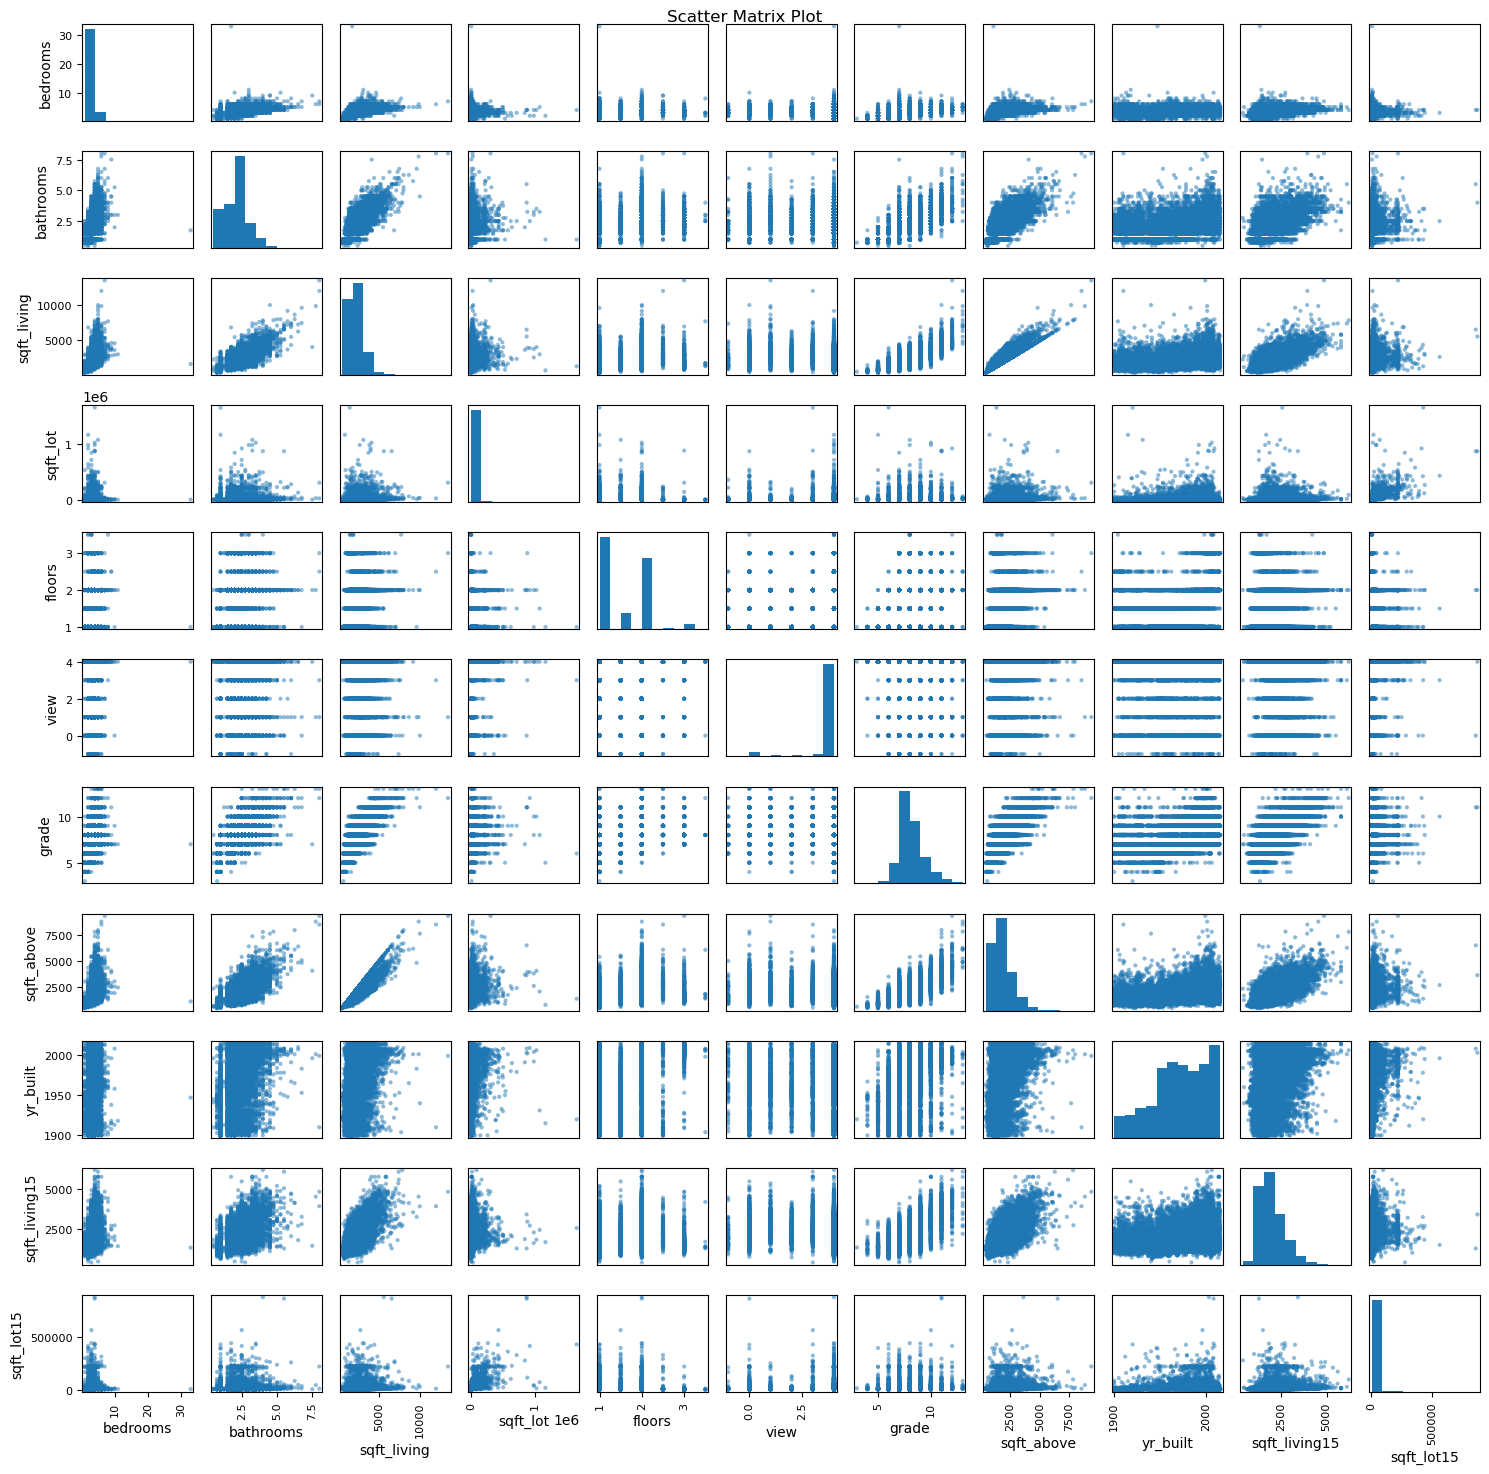

In [15]:
# Selecting features to visualize
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
            'view', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'sqft_living15',
            'sqft_lot15']

# Creating a scatter matrix plot
pd.plotting.scatter_matrix(df_encoded[features], figsize=(15, 15))
plt.suptitle('Scatter Matrix Plot')
plt.tight_layout()
plt.show()

In [16]:
#Normalizing 'bedrooms' and 'bathrooms features'

# Calculating the mean and standard deviation of 'bedrooms' and 'bathrooms'
bedrooms_mean = df_encoded['bedrooms'].mean()
bedrooms_std = df_encoded['bedrooms'].std()
bathrooms_mean = df_encoded['bathrooms'].mean()
bathrooms_std = df_encoded['bathrooms'].std()

# Excluding buildings with outliers in 'bedrooms' and 'bathrooms' columns
df_encoded = df_encoded[(df_encoded['bedrooms'] > (bedrooms_mean - 3 * bedrooms_std)) & (df_encoded['bedrooms'] < (bedrooms_mean + 3 * bedrooms_std)) &
        (df_encoded['bathrooms'] > (bathrooms_mean - 3 * bathrooms_std)) & (df_encoded['bathrooms'] < (bathrooms_mean + 3 * bathrooms_std))]

df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21358 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                21358 non-null  float64
 1   bedrooms             21358 non-null  int64  
 2   bathrooms            21358 non-null  float64
 3   sqft_living          21358 non-null  int64  
 4   sqft_lot             21358 non-null  int64  
 5   floors               21358 non-null  float64
 6   waterfront           21358 non-null  int8   
 7   view                 21358 non-null  int8   
 8   grade                21358 non-null  int64  
 9   sqft_above           21358 non-null  int64  
 10  sqft_basement        20913 non-null  object 
 11  yr_built             21358 non-null  int64  
 12  sqft_living15        21358 non-null  int64  
 13  sqft_lot15           21358 non-null  int64  
 14  condition_Average    21358 non-null  bool   
 15  condition_Fair       21358 non-null  bool

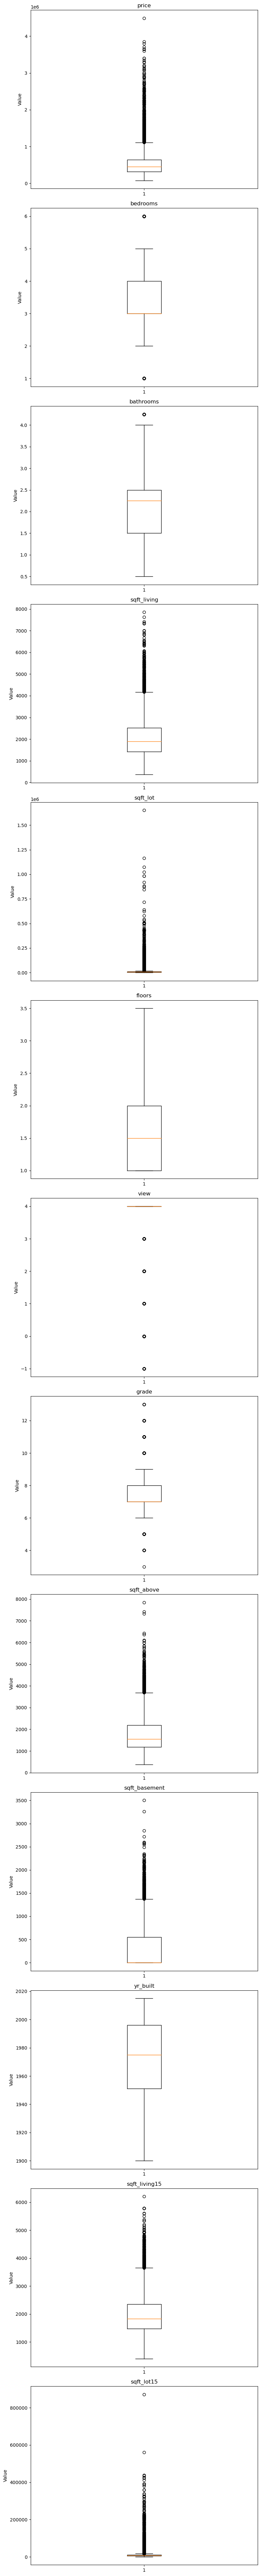

In [17]:
# Selecting  features to recheck for outliers via Box Plots
features = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
            'view', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'sqft_living15',
            'sqft_lot15']

# Converting the selected columns to numeric data type
df_encoded[features] = df_encoded[features].apply(pd.to_numeric, errors='coerce')

# Creating box plots for each feature
fig, axs = plt.subplots(nrows=len(features), figsize=(8, 6 * len(features)))

for i, feature in enumerate(features):
    axs[i].boxplot(df_encoded[feature].dropna())
    axs[i].set_title(feature)
    axs[i].set_ylabel('Value')

plt.tight_layout()
plt.show()